# **<font face='sans-serif' size=36> <span style="color:#008080"> <center> Air Quality Index Prediction </center> </span> </font>**<img src="aqi.png" width="1000" height="400">

#### **<font face='sans-serif' size=5>Name:Mariyambi nazar**</font>
#### **<font face='sans-serif' size=5>Organization:Entri Elavate**</font>
#### **<font face='sans-serif' size=5>Date:28/05/2024**</font>

#  **<font face='sans-serif' size=6>Overview of Problem Statement</font>**
##  <i><font  face='sans-serif' size=4> <span style="color:#008080" >In the midst of contemporary urbanization and growing environmental concerns, the accurate prediction of Air Quality Index (AQI) has emerged as a pivotal challenge. This Machine Learning (ML) project is dedicated to forecasting AQI levels through advanced predictive analytics. With increasing awareness of the health ramifications of air pollution, the project employs regression analysis, Random Forest (RF), Support Vector Machines (SVM), and other ML techniques. By analyzing diverse datasets comprising air pollutant concentrations and meteorological parameters, the project aims to equip stakeholders with actionable insights to facilitate informed decision-making. This endeavor represents a significant stride towards achieving cleaner air and fostering sustainable rban environments.</i></font></span>
 


#  **<font face='sans-serif'>Objective</font>**
## <font face='sans-serif' size=4>  <span style="color:#008080"><i>This project aims to employ Machine Learning methods to forecast Air Quality Index (AQI) levels effectively, facilitating informed decision-making for air quality management and public health initiatives.</i> </font></span>
<font face='sans-serif' size=4>  <span style="color:#008080">
#### 1. Data Collection
#### 2. Data Cleaning and Preprocessing
#### 3. Exploratory Data Analysis (EDA)
#### 4. Feature Engineering
#### 5. Feature Selection
#### 6. Feature Scaling
#### 7. Split Data into Training and Testing Sets
#### 8. Build the ML Model
#### 9. Model Evaluation
#### 10. Hyperparameter Tuning </font></span>

<center><img src="C:\Users\MyLap\Pictures\aqi2.jpg" width="700" height="400"></center>

#  **<font face='sans-serif'>Data Description</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Features in Dataset:The dataset is structured to include a variety of features that provide a holistic view of air quality. 
</span></font></i></font></i>

#### 1.Country:
The country where the city is located. This helps in identifying the broader geographical and regulatory                            context for the air quality data.
#### 2.City:
The specific city for which the air quality data is being reported. Different cities can have vastly different air quality profiles due to factors like industrial activity, traffic, and geography.
#### 3.AQI Value:
The overall Air Quality Index (AQI) value, which is a composite number used to communicate how polluted the air currently is or how polluted it is forecast to become. The AQI is calculated based on the levels of various pollutants including ground-level ozone, particulate matter (PM2.5 and PM10), carbon monoxide (CO), sulfur dioxide (SO2), and nitrogen dioxide (NO2).
#### 4.AQI Categories:
##### Good
##### Moderate
##### Unhealthy for Sensitive Groups
##### Unhealthy
##### Very Unhealthy
#### 5.CO AQI Value:
The AQI value specifically for carbon monoxide (CO). Carbon monoxide is a colorless, odorless gas that can be harmful when inhaled in large amounts. It is typically produced by motor vehicles, industrial processes, and residential heating systems.
#### 6.CO AQI Category:
The category that corresponds to the CO AQI value. Categories often range from "Good" to "Hazardous" and provide a quick understanding of the potential health impacts of the CO levels. Common categories include:
Good
Moderate
Unhealthy for Sensitive Groups
Unhealthy
Very Unhealthy
Hazardous
#### 7.Ozone AQI Value:
The AQI value specifically for ozone (O3). Ground-level ozone is a key component of smog and is harmful to respiratory health.
#### 8.Ozone AQI Category:
The category corresponding to the ozone AQI value, indicating the health risks associated with the current ozone levels.
#### 10.NO2 AQI Category:
The category for nitrogen dioxide (NO2) levels. NO2 is a significant air pollutant that contributes to the formation of smog and acid rain and can have adverse health effects, particularly on the respiratory system.
#### 11.PM2.5 AQI Value:
The AQI value specifically for fine particulate matter (PM2.5). PM2.5 refers to particulate matter that is less than 2.5 micrometers in diameter. These particles can penetrate the respiratory system and have been linked to various health problems, including heart and lung diseases.
#### 12.PM2.5 AQI Category:
The category corresponding to the PM2.5 AQI value, indicating the potential health effects of the current PM2.5 levels.
g
#### 13.Latitude (Lat): 
The latitude coordinate of the city. Latitude is a geographical coordinate that specifies the north-south position of a point on the Earth's surface.

#### 14.Longitude (Lng): 
The longitude coordinate of the city. Longitude is a geographical coordinate that specifies the east-west position of a point on the Earth's surface.

## Dataset:
Dataset taken from kaggle-
<a href="https://example.com" style="color: blue;">https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates?resource=download </a>


#  **<font face='sans-serif'>Data Collection</font>**

### **<font face='sans-serif'>Import Libraries**</font>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,root_mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif,f_regression
from sklearn.pipeline import Pipeline


In [2]:
# Load the dataset
df=pd.read_csv("C:\\Users\\MyLap\\Downloads\\archive (3)\\AQI and Lat Long of Countries.csv")
# Display the first few rows of the dataset
df.head

<bound method NDFrame.head of                         Country              City  AQI Value AQI Category  \
0            Russian Federation        Praskoveya         51     Moderate   
1                        Brazil  Presidente Dutra         41         Good   
2                        Brazil  Presidente Dutra         41         Good   
3                         Italy   Priolo Gargallo         66     Moderate   
4                        Poland         Przasnysz         34         Good   
...                         ...               ...        ...          ...   
16690  United States of America  Highland Springs         54     Moderate   
16691                  Slovakia            Martin         71     Moderate   
16692                  Slovakia            Martin         71     Moderate   
16693                    France            Sceaux         50         Good   
16694  United States of America       Westerville         71     Moderate   

       CO AQI Value CO AQI Category  Ozone AQ

#  **<font face='sans-serif'>Data Cleaning and Preprocessing</font>**

#####  <i><font face='sans-serif' size=3><span style="color:#008080">Before diving into the analysis, it's important to clean and preprocess the data to ensure accurate and meaningful results. We will handle missing values, remove irrelevant columns, and perform any necessary transformations

In [3]:
# Display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [4]:
# Display column names
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [5]:
# Display descriptive statistics for all columns
df.describe(include ='all')

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
count,16393,16695,16695.000000,16695,16695.000000,16695,16695.000000,16695,16695.000000,16695,16695.000000,16695,16695.000000,16695.000000
unique,174,14229,NaN,6,NaN,3,NaN,5,NaN,2,NaN,6,NaN,NaN
top,United States of America,Santa Cruz,NaN,Good,NaN,Good,NaN,Good,NaN,Good,NaN,Good,NaN,NaN
freq,3954,17,NaN,7708,NaN,16691,NaN,15529,NaN,16684,NaN,7936,NaN,NaN
mean,NaN,NaN,62.998682,NaN,1.342138,NaN,31.767355,NaN,3.819647,NaN,59.821324,NaN,30.267148,-3.944485
std,NaN,NaN,43.091971,NaN,2.371379,NaN,22.839343,NaN,5.880677,NaN,43.208298,NaN,22.947398,73.037148
min,NaN,NaN,7.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,-54.801900,-171.750000
25%,NaN,NaN,38.500000,NaN,1.000000,NaN,20.000000,NaN,0.000000,NaN,34.000000,NaN,16.515450,-75.180000
50%,NaN,NaN,52.000000,NaN,1.000000,NaN,29.000000,NaN,2.000000,NaN,52.000000,NaN,38.815800,5.643100
75%,NaN,NaN,69.000000,NaN,1.000000,NaN,38.000000,NaN,5.000000,NaN,69.000000,NaN,46.683300,36.275000


In [6]:
# Display the number of missing values in each column
df.isnull().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [7]:
# Display the number of missing values in each column before dropping
df.dropna(inplace=True)
df.isna().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
lat                   0
lng                   0
dtype: int64

In [8]:
#Displaying the duplicate values
df.duplicated().sum()

0

In [9]:
#Displaying the duplicate values in the column 'City'
df.duplicated(subset='City').sum()

2437

In [10]:
#Dropping the duplicates found in the 'City' column
df = df.drop_duplicates(subset='City')

In [11]:
#Resetting the index after dropping the duplicates
df.reset_index(drop=True, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13956 entries, 0 to 13955
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             13956 non-null  object 
 1   City                13956 non-null  object 
 2   AQI Value           13956 non-null  int64  
 3   AQI Category        13956 non-null  object 
 4   CO AQI Value        13956 non-null  int64  
 5   CO AQI Category     13956 non-null  object 
 6   Ozone AQI Value     13956 non-null  int64  
 7   Ozone AQI Category  13956 non-null  object 
 8   NO2 AQI Value       13956 non-null  int64  
 9   NO2 AQI Category    13956 non-null  object 
 10  PM2.5 AQI Value     13956 non-null  int64  
 11  PM2.5 AQI Category  13956 non-null  object 
 12  lat                 13956 non-null  float64
 13  lng                 13956 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.5+ MB


#  **<font face='sans-serif'> Exploratory Data Analysis</font>**
#####  <i><font face='sans-serif' size=3><span style="color:#008080">Exploratory Data Analysis (EDA) is essential for understanding datasets. It helps uncover patterns, identify anomalies, and extract insights using summary statistics and visualizations. This project will employ Python tools like pandas, matplotlib, and seaborn to conduct EDA, facilitating a deeper understanding of the data and setting the stage for advanced analysis

In [13]:
# Display the shape of the DataFrame
df.shape

(13956, 14)

In [14]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [15]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,13956.000000,13956.000000,13956.000000,13956.000000,13956.000000,13956.000000,13956.000000
mean,63.216538,1.325093,32.558613,3.518917,59.896389,30.935687,0.842514
std,43.535318,1.985798,23.435088,5.666271,43.629999,23.015090,70.334285
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-159.771000
25%,38.000000,1.000000,21.000000,0.000000,34.000000,17.994225,-71.687850
50%,52.000000,1.000000,30.000000,2.000000,52.000000,39.316700,8.131650
75%,69.000000,1.000000,38.000000,4.000000,69.000000,48.166700,37.799225
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [16]:
# Sort DataFrame by multiple columns
df.sort_values(by=['AQI Value','PM2.5 AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value'],ascending=True).head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
5507,Ecuador,Macas,7,Good,1,Good,7,Good,0,Good,7,Good,-2.3667,-78.1333
13839,Papua New Guinea,Tari,8,Good,0,Good,8,Good,0,Good,7,Good,-5.8489,142.9506
8710,Ecuador,Azogues,8,Good,0,Good,7,Good,0,Good,8,Good,-2.7333,-78.8333
4520,Peru,Huaraz,9,Good,0,Good,9,Good,0,Good,8,Good,-9.5333,-77.5333
4707,Peru,Huancavelica,10,Good,0,Good,2,Good,1,Good,10,Good,-12.7864,-74.9756


In [17]:
# Create a pivot table
df.pivot_table(
     ['PM2.5 AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value'],
     ['AQI Value'],
     aggfunc='mean',
 )

,CO AQI Value,NO2 AQI Value,Ozone AQI Value,PM2.5 AQI Value
AQI Value,,,,
7,1.000000,0.000000,7.000000,7.000000
8,0.000000,0.000000,7.500000,7.500000
9,0.000000,0.000000,9.000000,8.000000
10,0.333333,0.333333,5.666667,10.000000
11,0.090909,0.272727,10.909091,7.090909
...,...,...,...,...
421,27.000000,91.000000,0.000000,415.000000
425,1.000000,1.000000,93.000000,379.000000
438,1.000000,1.000000,56.000000,383.000000


In [18]:
# Select rows 0 to 3 and columns from 'Country' to 'AQI Category'
df.loc[0:3,'Country':'AQI Category']

,Country,City,AQI Value,AQI Category
0,Russian Federation,Praskoveya,51,Moderate
1,Brazil,Presidente Dutra,41,Good
2,Italy,Priolo Gargallo,66,Moderate
3,Poland,Przasnysz,34,Good


In [19]:
# Select rows from DataFrame where the first letter of the 'Country' column is 'U'
df[df['Country'].apply(lambda country: str(country)[0]=="U" if pd.notnull(country) else False)]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
4,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,16.1005,-88.8074
11,United States of America,Phoenix,72,Moderate,1,Good,4,Good,23,Good,72,Moderate,33.5722,-112.0892
18,United States of America,Pontiac,77,Moderate,2,Good,22,Good,15,Good,77,Moderate,42.6493,-83.2878
23,United States of America,Port Neches,34,Good,1,Good,19,Good,7,Good,34,Good,29.9765,-93.9459
24,United Kingdom of Great Britain and Northern I...,Port Talbot,51,Moderate,1,Good,20,Good,5,Good,51,Moderate,51.5906,-3.7986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13945,United States of America,Sand Springs,56,Moderate,1,Good,49,Good,2,Good,56,Moderate,36.1353,-96.1283
13949,United States of America,El Reno,39,Good,1,Good,39,Good,1,Good,35,Good,35.5429,-97.9660
13950,United Kingdom of Great Britain and Northern I...,Urmston,33,Good,1,Good,30,Good,3,Good,33,Good,53.4487,-2.3747
13952,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285


In [20]:
#cross-tabulation between two columns ("AQI Value" and "PM2.5 AQI Value") in a DataFrame df
pd.crosstab(df["AQI Value"],df["PM2.5 AQI Value"],margins=True)

PM2.5 AQI Value,0,2,3,4,5,6,7,8,9,10,...,437,443,446,466,467,471,475,487,500,All
AQI Value,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,3
11,0,0,1,1,3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


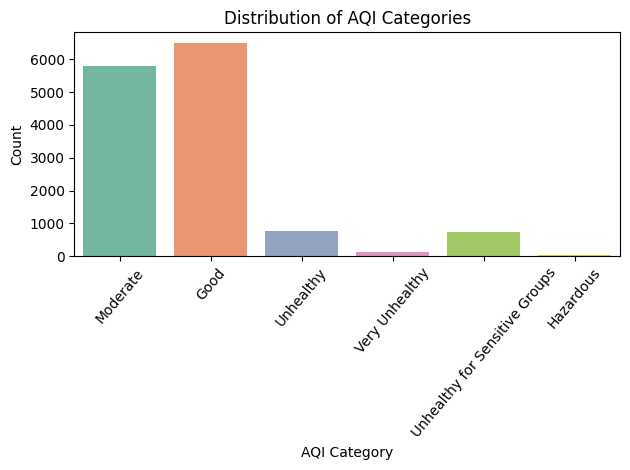

In [21]:
sns.countplot(data=df, x='AQI Category',hue='AQI Category', palette="Set2")#This line creates the countplot. 
plt.title('Distribution of AQI Categories') #Sets the title of the plot.
plt.xlabel('AQI Category')# Sets the label for the x-axis.
plt.ylabel('Count')#Sets the label for the y-axis.
plt.xticks(rotation=50)#Rotates the x-axis labels by 50 degrees to avoid overlap if the labels are long.  
plt.tight_layout()# Adjusts the layout of the plot to prevent overlapping elements. 
plt.show()# Displays the plot.

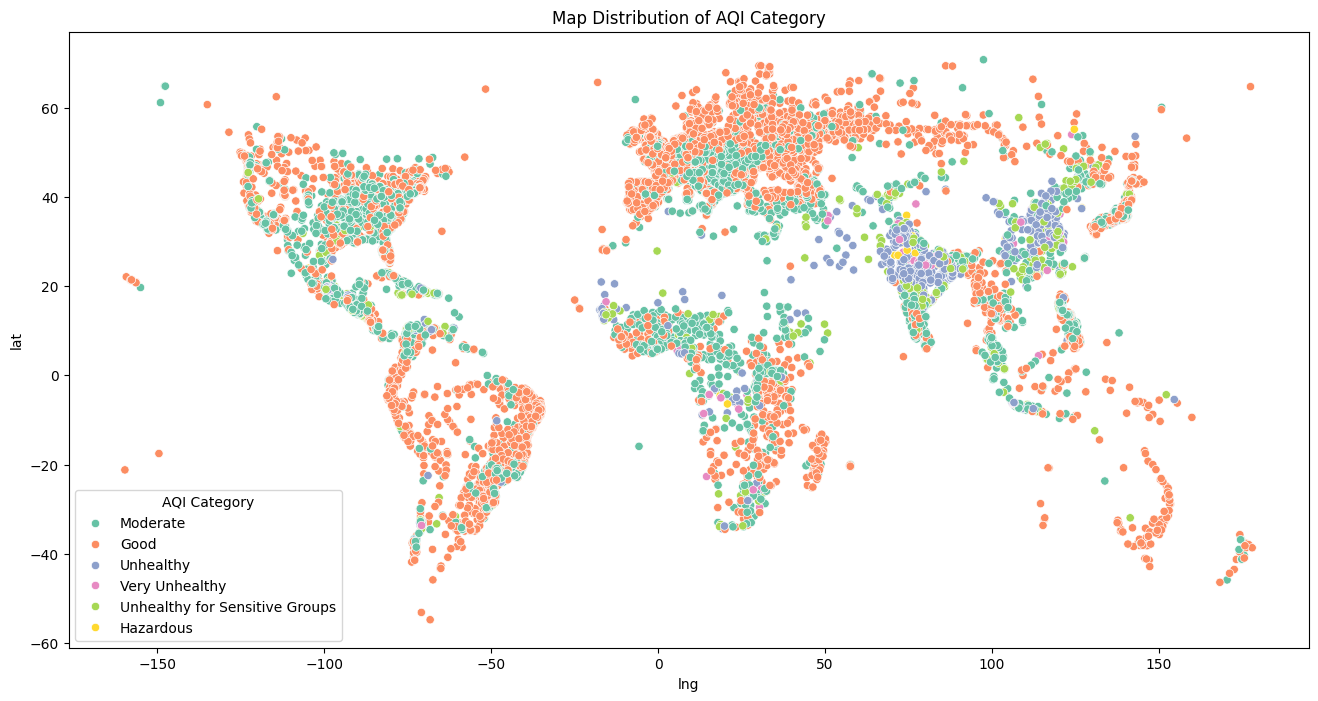

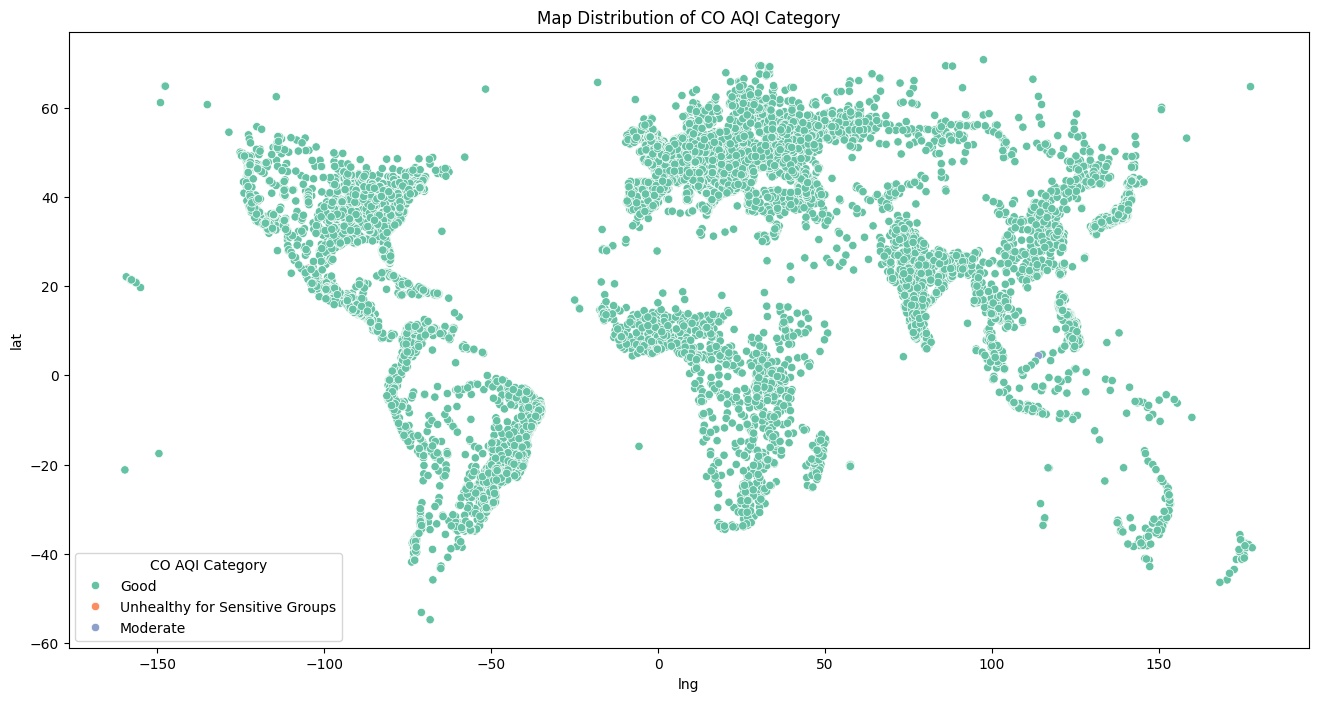

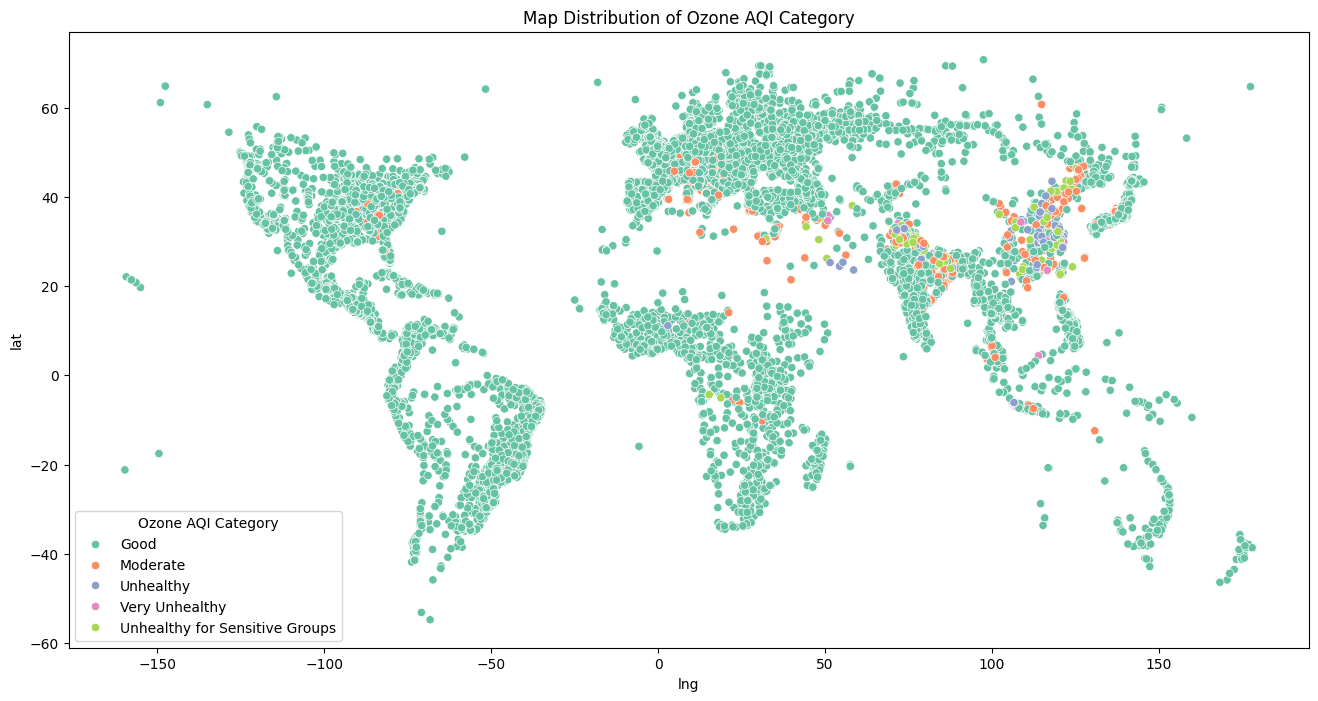

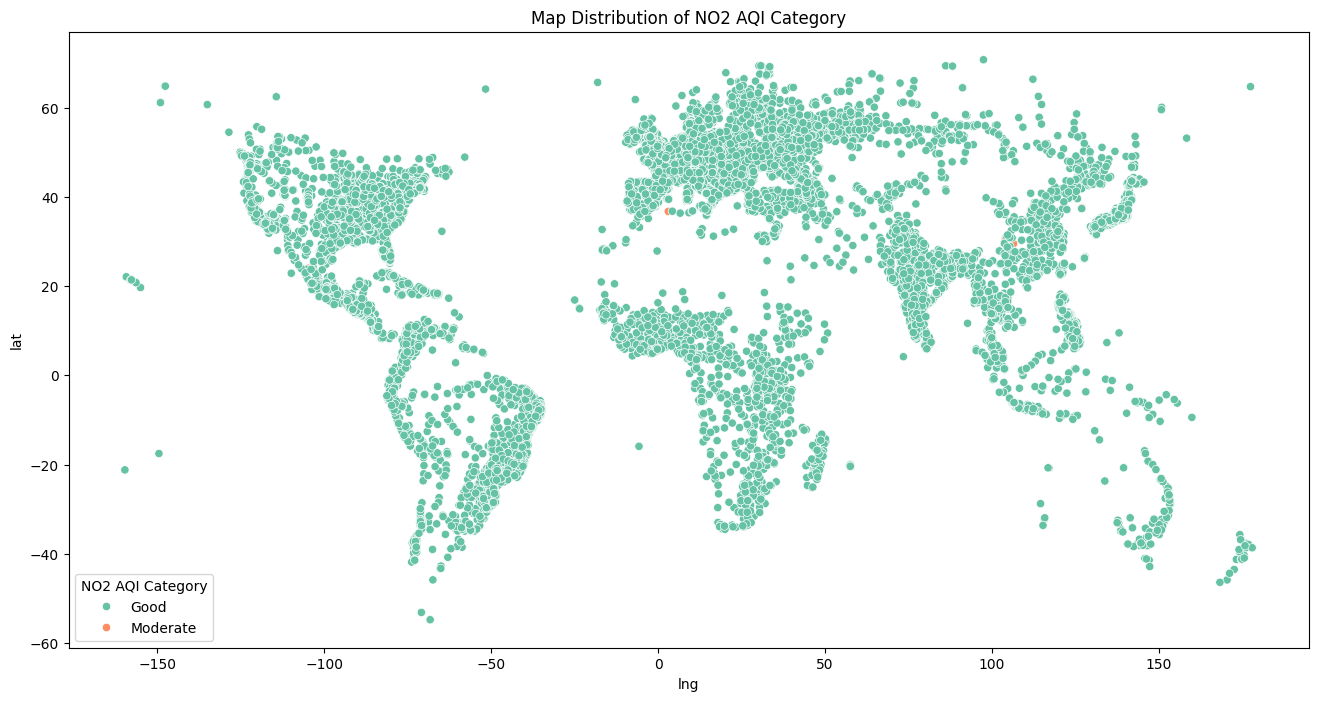

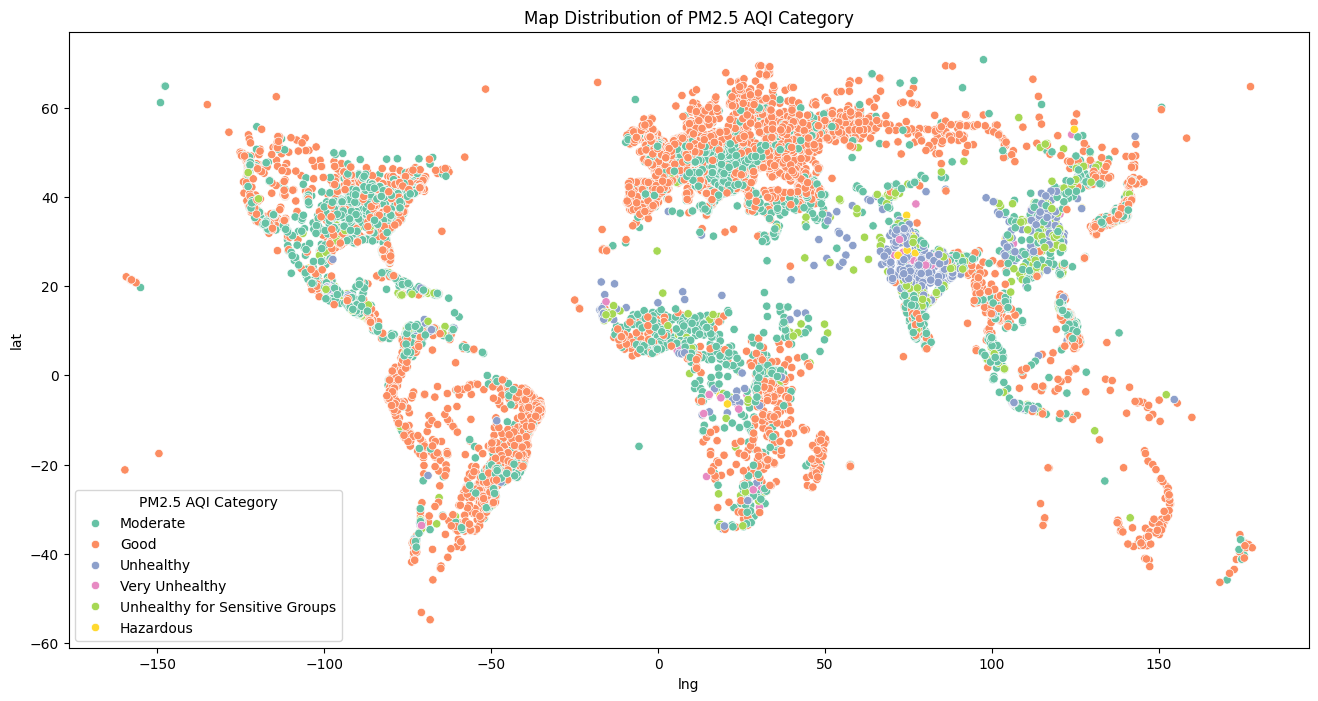

In [22]:
for x in ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']:
 #This line iterates over the list of AQI categories.
    plt.figure(figsize=(16, 8))
    #This line creates a new figure with a specified size (16 units wide and 8 units tall) for each scatter plot.
    
    sns.scatterplot(data=df,x='lng',y='lat',hue=df[x], palette="Set2")
    #This line creates a scatter plot using seaborn's scatterplot() function.
    
    plt.title(f'Map Distribution of {x}')
    #This line sets the title of the scatter plot

<Figure size 1200x800 with 0 Axes>

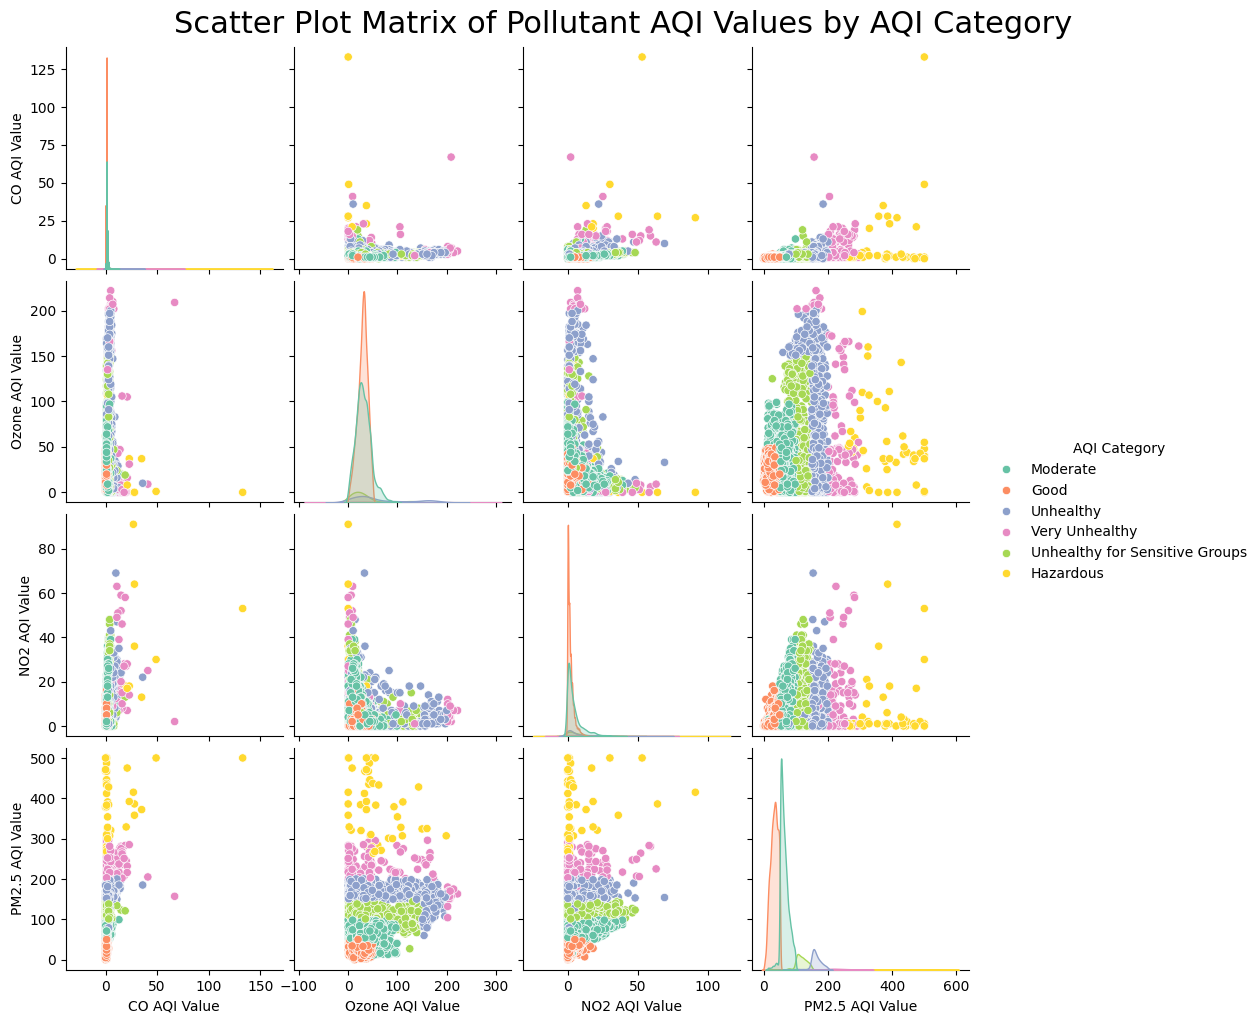

In [23]:
plt.figure(figsize=(12, 8))

# Create a pair plot with scatter plots for each combination of variables with respect to AQI Category
sns.pairplot(data=df, vars=['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value'],
             hue='AQI Category', palette="Set2", height=2.5)

# Set the title
plt.suptitle('Scatter Plot Matrix of Pollutant AQI Values by AQI Category', y=1.02, fontsize=22)

# Show the plot
plt.show()

<Axes: xlabel='AQI Value', ylabel='Count'>

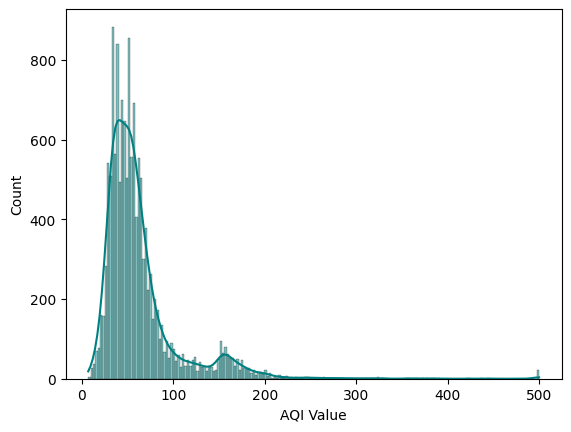

In [24]:
plt.figure()#Creates a new figure for the histogram plot.
sns.histplot(data=df,x="AQI Value",color='teal',kde=True)#Uses seaborn's histplot() function to create a histogram. 

In [25]:
#This code seems to be performing a groupby operation on the DataFrame df based on the "Country" column. Then, it's aggregating the sum of each group, sorting the result by the sum of "AQI Value" in descending order, and finally selecting the top 5 rows.
country = df.groupby('Country', as_index=False).agg('sum').sort_values(by=['AQI Value'], ascending=False).head(5)
country

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
166,United States of America,Punta GordaPhoenixPontiacPort NechesPortalesPo...,165391,ModerateModerateModerateGoodModerateModerateGo...,4027,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,76936,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,23574,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,160796,ModerateModerateModerateGoodModerateModerateGo...,104956.6901,-244231.4535
69,India,DarbhangaDharmapuriTekkaliJabalpurUmariaGovind...,101335,Very UnhealthyModerateUnhealthyUnhealthyUnheal...,1228,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,38363,UnhealthyGoodModerateGoodModerateGoodGoodGoodG...,1315,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,99558,Very UnhealthyModerateUnhealthyUnhealthyUnheal...,15410.9827,57699.4576
75,Italy,Priolo GargalloRamaccaGuardiagreleTeanoTeramoI...,52227,ModerateModerateModerateGoodGoodModerateModera...,945,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,37285,GoodGoodGoodGoodGoodModerateGoodGoodGoodModera...,1910,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,47315,ModerateModerateModerateGoodGoodModerateModera...,36085.4201,10193.3667
58,Germany,HeddesheimHeiligenhausHaigerHarrisleeHasbergen...,49562,ModerateGoodGoodGoodGoodModerateModerateGoodGo...,833,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,36910,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,2036,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,47281,ModerateGoodGoodGoodGoodModerateModerateGoodGo...,52724.2906,9583.0889
33,China,QinzhouHangzhouTianjinXushanYanchengYanjiFuzho...,48383,ModerateVery UnhealthyUnhealthy for Sensitive ...,1320,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,33184,ModerateVery UnhealthyUnhealthy for Sensitive ...,2639,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,42819,ModerateUnhealthyUnhealthy for Sensitive Group...,13067.4887,44749.8754


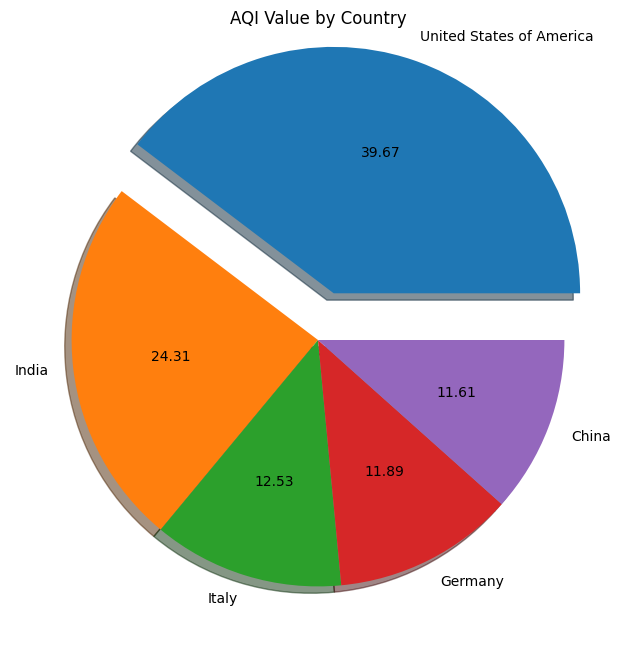

In [26]:
plt.figure(figsize=(10, 8))
plt.pie(data=country ,x='AQI Value', labels='Country', autopct='%.2f', shadow=True, explode=(0.2, 0, 0, 0, 0), colors=None)
plt.title('AQI Value by Country')
plt.show()

In [27]:
corr_matrix=df[["AQI Value","CO AQI Value","NO2 AQI Value","Ozone AQI Value","PM2.5 AQI Value"]].corr()
corr_matrix

,AQI Value,CO AQI Value,NO2 AQI Value,Ozone AQI Value,PM2.5 AQI Value
AQI Value,1.000000,0.495144,0.308366,0.348281,0.979874
CO AQI Value,0.495144,1.000000,0.433509,0.074985,0.493940
NO2 AQI Value,0.308366,0.433509,1.000000,-0.229369,0.339855
Ozone AQI Value,0.348281,0.074985,-0.229369,1.000000,0.252082
PM2.5 AQI Value,0.979874,0.493940,0.339855,0.252082,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

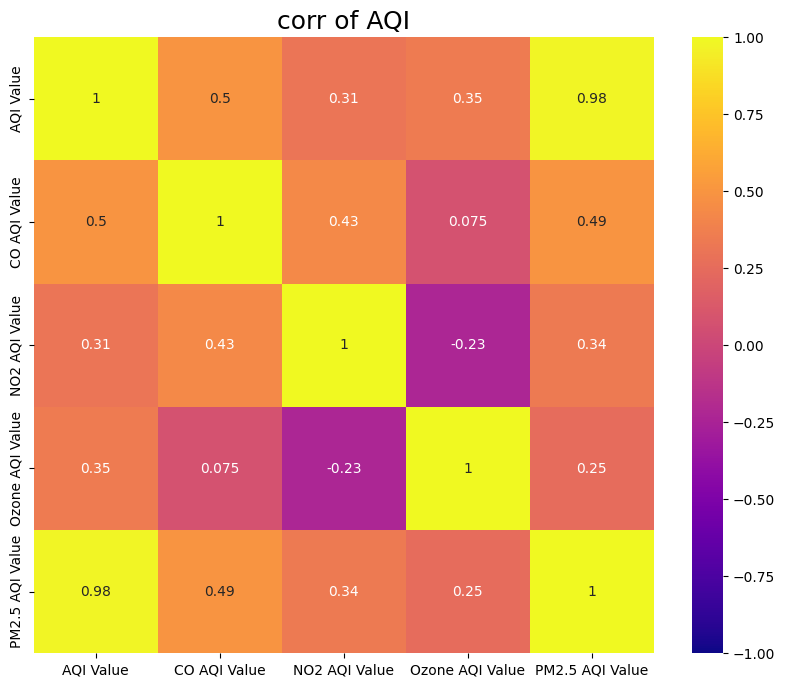

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='plasma',vmin=-1,vmax=1)
plt.title("corr of AQI",fontsize=18)
plt.show

In [29]:
numeric_columns = ['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']
z_scores = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

In [30]:
print("Outliers:")
print(outliers.sum())

Outliers:
AQI Value          207
CO AQI Value       112
Ozone AQI Value    314
NO2 AQI Value      325
PM2.5 AQI Value    190
dtype: int64


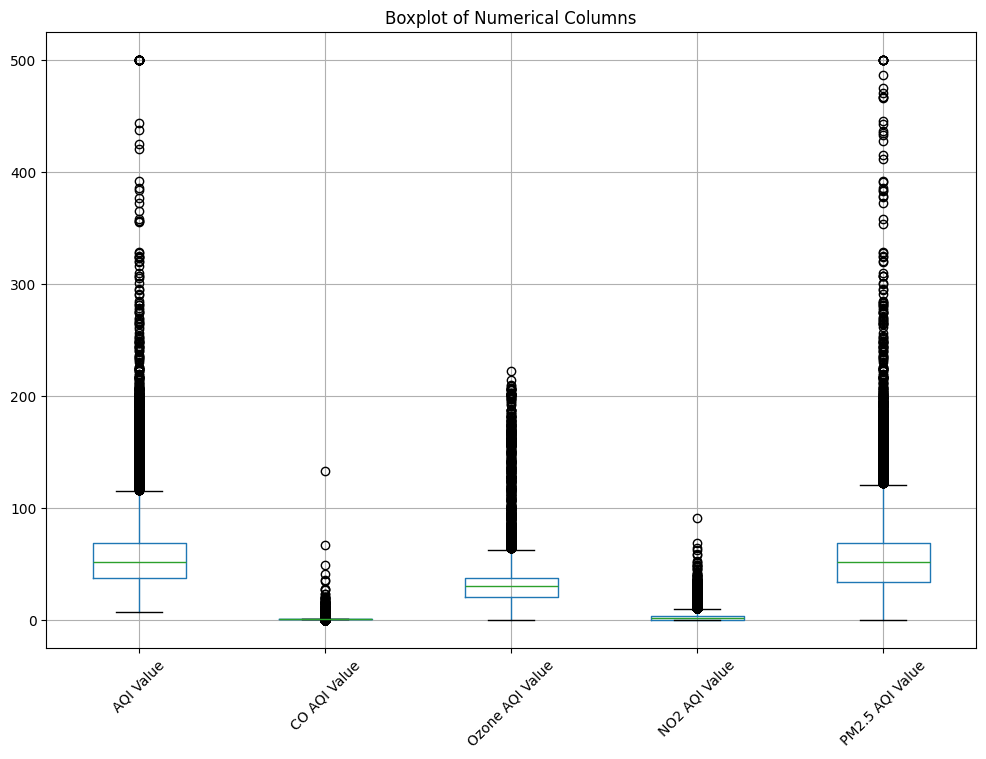

In [31]:
df.boxplot(column=numeric_columns, figsize=(12, 8))
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Columns")
plt.show()

In [32]:
encoder = LabelEncoder()

In [33]:
df.loc[:, 'AQI Category'] = encoder.fit_transform(df['AQI Category'])

In [34]:
df.loc[:, 'CO AQI Category'] = encoder.fit_transform(df['CO AQI Category'])

In [35]:
 df.loc[:, 'NO2 AQI Category'] = encoder.fit_transform(df['NO2 AQI Category'])

In [36]:
df.loc[:, 'Ozone AQI Category'] = encoder.fit_transform(df['Ozone AQI Category'])

In [37]:
df.loc[:, 'PM2.5 AQI Category'] = encoder.fit_transform(df['PM2.5 AQI Category'])

In [38]:
df.loc[:, 'Country'] = encoder.fit_transform(df['Country'])

In [39]:
df.loc[:, 'City'] = encoder.fit_transform(df['City'])

In [40]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,9931,51,2,1,0,36,0,0,0,51,2,44.7444,44.2031
1,22,9945,41,0,1,0,5,0,1,0,41,0,-5.2900,-44.4900
2,75,9967,66,2,1,0,39,0,2,0,66,2,37.1667,15.1833
3,123,9987,34,0,1,0,34,0,0,0,20,0,53.0167,20.8833
4,166,10039,54,2,1,0,14,0,11,0,54,2,16.1005,-88.8074


In [41]:
X=df.drop(columns=["AQI Value","AQI Category"])
y=df["AQI Value"]


In [42]:
X

,Country,City,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,9931,1,0,36,0,0,0,51,2,44.7444,44.2031
1,22,9945,1,0,5,0,1,0,41,0,-5.2900,-44.4900
2,75,9967,1,0,39,0,2,0,66,2,37.1667,15.1833
3,123,9987,1,0,34,0,0,0,20,0,53.0167,20.8833
4,166,10039,1,0,14,0,11,0,54,2,16.1005,-88.8074
...,...,...,...,...,...,...,...,...,...,...,...,...
13951,33,11239,3,0,160,2,1,0,79,2,24.8011,113.5927
13952,166,4930,1,0,34,0,5,0,54,2,37.5516,-77.3285
13953,140,7526,1,0,39,0,1,0,71,2,49.0650,18.9219
13954,54,11022,1,0,20,0,5,0,50,0,48.7786,2.2906


In [43]:
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df = remove_outliers(df, numerical_cols)

In [44]:
vt = VarianceThreshold()
x = vt.fit_transform(X)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('feature_selection', SelectKBest(score_func=f_classif, k=5)),  # Select top 'k' features based on ANOVA F-test
])   

In [47]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=5))])

In [48]:
X_train_selected = pipeline.fit_transform(X_train, y_train)
X_test_selected =pipeline.transform(X_test)

In [49]:
selected_indices = pipeline.named_steps['feature_selection'].get_support(indices=True)
selected_features = X.columns[selected_indices]

In [50]:
print("selected feature:",selected_features)


selected feature: Index(['CO AQI Value', 'Ozone AQI Category', 'NO2 AQI Category',
       'PM2.5 AQI Value', 'PM2.5 AQI Category'],
      dtype='object')


In [51]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [52]:
feature_importances = rf.feature_importances_


In [53]:
sorted_indices = feature_importances.argsort()[::-1]

In [54]:
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")


Feature Importances:
PM2.5 AQI Value: 0.9709024999079168
Ozone AQI Value: 0.025104792357642947
PM2.5 AQI Category: 0.001781486923809606
lat: 0.0008369549538419585
Ozone AQI Category: 0.0004262214677508622
CO AQI Value: 0.00032811064034632875
NO2 AQI Value: 0.00025576924460820694
Country: 0.0001970480500762818
lng: 8.041236473264463e-05
City: 8.022870217782292e-05
NO2 AQI Category: 6.443862879018349e-06
CO AQI Category: 3.1524217582808124e-08


In [55]:
sfm = SelectFromModel(rf, threshold='median')
X_selected = sfm.fit_transform(X_train, y_train)


In [56]:
selected_features = X.columns[sfm.get_support()]
print("\nSelected Features:")
print(selected_features)


Selected Features:
Index(['CO AQI Value', 'Ozone AQI Value', 'Ozone AQI Category',
       'PM2.5 AQI Value', 'PM2.5 AQI Category', 'lat'],
      dtype='object')


In [57]:

model = MLPRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [58]:
# Print results
print("Mean_absolute_error:",mae)
print("Mean_squared_error:",mse)
print("Rootmean_squared_error:",rmse)
print("R2_score:",r2 )


Mean_absolute_error: 4.556619165472113
Mean_squared_error: 31.220596686195496
Rootmean_squared_error: 5.587539412495942
R2_score: 0.9826307620872284


In [59]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=5)
regressor.fit(X_train, y_train)
y_pred= regressor.predict(X_test)
r2= r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [60]:
print("Mean_absolute_error:",mae)
print("Mean_squared_error:",mse)
print("Rootmean_squared_error:",rmse)
print("R2_score:",r2 )


Mean_absolute_error: 2.4076232972260563
Mean_squared_error: 20.060792177234884
Rootmean_squared_error: 4.47892756999205
R2_score: 0.9888393974161575


In [61]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test, y_pred)

In [62]:
print("Mean_absolute_error:",mae)
print("Mean_squared_error:",mse)
print("Rootmean_squared_error:",rmse)
print("R2_score:",r2 )

Mean_absolute_error: 4.416515892967339
Mean_squared_error: 50.91105254862882
Rootmean_squared_error: 7.13519814361373
R2_score: 0.9716761920665743


In [63]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

          
y_pred= model.predict(X_test)

# Evaluate the model          
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [64]:
print("Mean_absolute_error:",mae)
print("Mean_squared_error:",mse)
print("Rootmean_squared_error:",rmse)
print("R2_score:",r2)

Mean_absolute_error: 0.9751840294856537
Mean_squared_error: 7.753290945484599
Rootmean_squared_error: 2.784473189938197
R2_score: 0.9956865412793791


In [65]:

model = AdaBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [66]:
print("Mean_absolute_error:",mae)
print("Mean_squared_error:",mse)
print("Rootmean_squared_error:",rmse)
print("R2_score:",r2 )

Mean_absolute_error: 8.596668901463802
Mean_squared_error: 116.61430926800028
Rootmean_squared_error: 10.798810548759539
R2_score: 0.9351229029326973


In [85]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'alpha': [0.0001, 0.001]
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

param_grid_lr = {}  # No hyperparameters to tune for Linear Regression

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

param_grid_ab = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

# Define models
models = {
    'MLPRegressor': (MLPRegressor(), param_grid_mlp),
    'RandomForestRegressor': (RandomForestRegressor(), param_grid_rf),
    'LinearRegression': (LinearRegression(), param_grid_lr),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), param_grid_gb),
    'AdaBoostRegressor': (AdaBoostRegressor(), param_grid_ab)
}

# Dictionary to store the best model for each algorithm
best_models = {}

# Perform grid search for each model
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    
   # Print best parameters
    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)
 
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"  - Mean Squared Error: {mse}")
    print(f"  - Root Mean Squared Error: {rmse}")
    print(f"  - Mean Absolute Error: {mae}")
    print(f"  - R-squared: {r2}")
# Print the best model for each algorithm
for model_name, best_model in best_models.items():
    print(f"Best model for {model_name}: {best_model}")

Best parameters for MLPRegressor:
{'alpha': 0.001, 'hidden_layer_sizes': (100,)}
Metrics for MLPRegressor:
  - Mean Squared Error: 5.9211797262319825
  - Root Mean Squared Error: 2.4333474322899273
  - Mean Absolute Error: 1.012105383524637
  - R-squared: 0.9967058163422393
Best parameters for RandomForestRegressor:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Metrics for RandomForestRegressor:
  - Mean Squared Error: 6.819216246339989
  - Root Mean Squared Error: 2.6113629097350657
  - Mean Absolute Error: 0.218293380638555
  - R-squared: 0.9962062035344222
Best parameters for LinearRegression:
{}
Metrics for LinearRegression:
  - Mean Squared Error: 50.91105254862882
  - Root Mean Squared Error: 7.13519814361373
  - Mean Absolute Error: 4.416515892967339
  - R-squared: 0.9716761920665743
Best parameters for GradientBoostingRegressor:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Metrics for GradientBoostingRegressor:
  - Mean Squared Error: 6.315166331

In [86]:
# Find the best model name based on the lowest mean squared error
best_model_name = min(best_models, key=lambda k: mean_squared_error(y_test, best_models[k].predict(X_test)))

print(f"The best model among the selected algorithms is: {best_model_name}")

The best model among the selected algorithms is: MLPRegressor


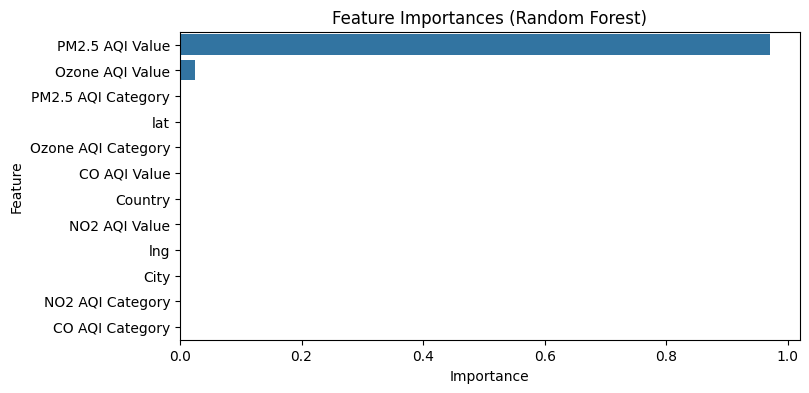

In [94]:
# Feature Importance Analysis
importances = models['RandomForestRegressor'].feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(8, 4))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
     

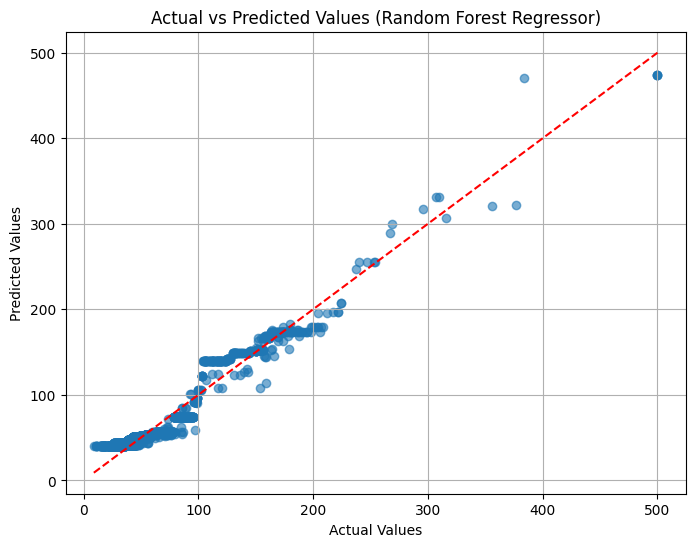

In [103]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line for reference
plt.title('Actual vs Predicted Values (Random Forest Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

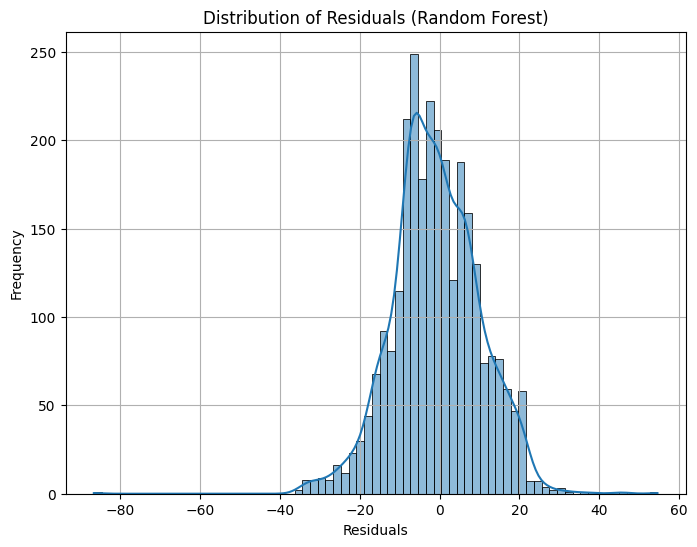

In [97]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [99]:
from joblib import dump

# Save the model
dump(best_model_name, 'model.joblib')

['model.joblib']